In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
classes = os.listdir('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test')
num_class=len(classes)
num_class

10

In [2]:
img=ImageDataGenerator(rescale=1./255)
#     ,rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest")
# from tensorflow.keras.applications.resnet50 import preprocess_input
# img = ImageDataGenerator(preprocessing_function=preprocess_input)
SEED = 42
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224
INIT_LR = 1e-3

In [3]:
train_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/train',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       subset = 'training',
                                       batch_size=BATCH_SIZE,
                                       )

Found 7280 images belonging to 10 classes.


In [4]:
val_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/val',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       
                                       batch_size=BATCH_SIZE,
                                       )

Found 1036 images belonging to 10 classes.


In [5]:
test_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test',
                                       target_size=(640,480),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 2091 images belonging to 10 classes.


In [6]:
xcep=tf.keras.applications.DenseNet201(input_shape=(640,480,3),weights='imagenet', include_top=False)
for i in xcep.layers:
    i.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.models.Sequential([
    xcep,
    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 20, 15, 1920)      18321984  
                                                                 
 conv2d (Conv2D)             (None, 20, 15, 128)       2211968   
                                                                 
 activation (Activation)     (None, 20, 15, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 20, 15, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 7, 128)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 7, 128)        0

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
callback2 = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 3, restore_best_weights = True)

In [11]:
history=model.fit(train_ds,validation_data=val_ds,epochs=20,callbacks = [callback2])

Epoch 1/20


2023-04-20 06:11:28.434689: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


114/114 [==============================] - 219s 2s/step - loss: 1.2469 - accuracy: 0.6080 - val_loss: 0.7531 - val_accuracy: 0.7654
Epoch 2/20
114/114 [==============================] - 161s 1s/step - loss: 0.4925 - accuracy: 0.8526 - val_loss: 0.5201 - val_accuracy: 0.8436
Epoch 3/20
114/114 [==============================] - 159s 1s/step - loss: 0.2918 - accuracy: 0.9183 - val_loss: 0.4337 - val_accuracy: 0.8697
Epoch 4/20
114/114 [==============================] - 156s 1s/step - loss: 0.1893 - accuracy: 0.9538 - val_loss: 0.3112 - val_accuracy: 0.9093
Epoch 5/20
114/114 [==============================] - 159s 1s/step - loss: 0.1370 - accuracy: 0.9702 - val_loss: 0.3091 - val_accuracy: 0.9170
Epoch 6/20
114/114 [==============================] - 159s 1s/step - loss: 0.0973 - accuracy: 0.9827 - val_loss: 0.2616 - val_accuracy: 0.9305
Epoch 7/20
114/114 [==============================] - 158s 1s/step - loss: 0.0751 - accuracy: 0.9872 - val_loss: 0.2370 - val_accuracy: 0.9295
Epoch 8/20

In [12]:
model.evaluate(test_ds)

33/33 [==============================] - 49s 1s/step - loss: 0.2274 - accuracy: 0.9378


[0.22740881145000458, 0.937828779220581]

In [13]:
model.save('densenet.h5')

metrics of densenet


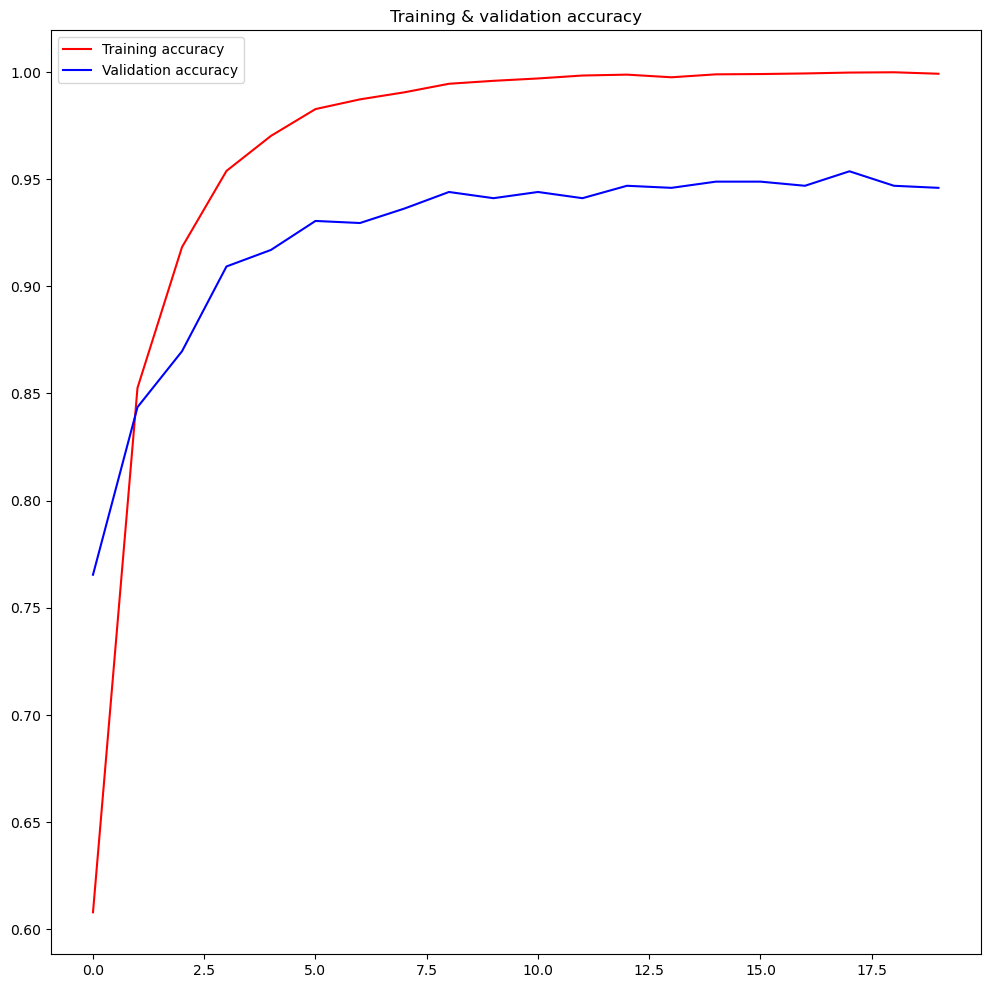

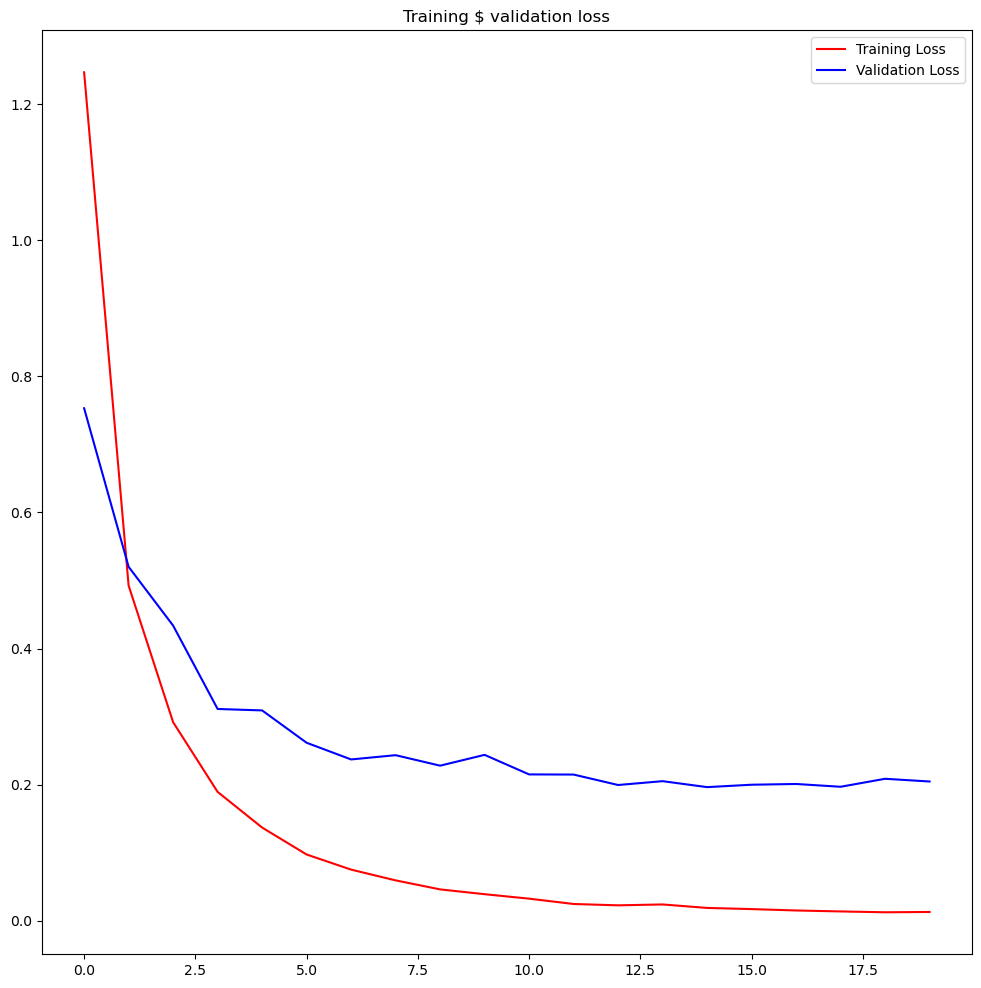

In [14]:
import matplotlib.pyplot as plt
print("metrics of densenet")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)

predictions = model.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

33/33 [==============================] - 42s 1s/step
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.97      0.89      0.92        97
   bacterial_leaf_streak       0.97      0.97      0.97        76
bacterial_panicle_blight       0.93      0.91      0.92        69
                   blast       0.93      0.95      0.94       349
              brown_spot       0.92      0.91      0.91       194
              dead_heart       0.97      0.96      0.96       289
            downy_mildew       0.92      0.89      0.90       124
                   hispa       0.91      0.96      0.93       320
                  normal       0.96      0.95      0.95       354
                  tungro       0.93      0.92      0.93       219

                accuracy                           0.94      2091
               macro avg       0.94      0.93      0.93      2091
            weighted avg       0.94      0.94      0.94      2091



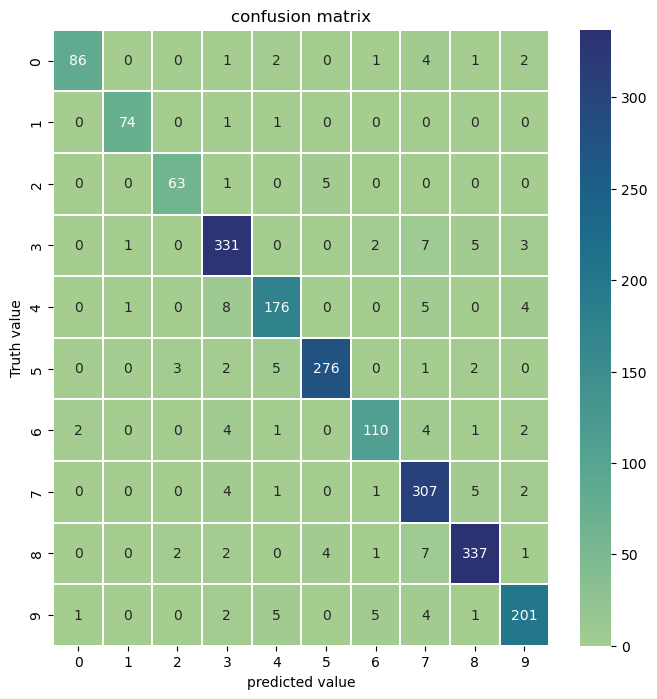

[[ 86   0   0   1   2   0   1   4   1   2]
 [  0  74   0   1   1   0   0   0   0   0]
 [  0   0  63   1   0   5   0   0   0   0]
 [  0   1   0 331   0   0   2   7   5   3]
 [  0   1   0   8 176   0   0   5   0   4]
 [  0   0   3   2   5 276   0   1   2   0]
 [  2   0   0   4   1   0 110   4   1   2]
 [  0   0   0   4   1   0   1 307   5   2]
 [  0   0   2   2   0   4   1   7 337   1]
 [  1   0   0   2   5   0   5   4   1 201]]


In [16]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


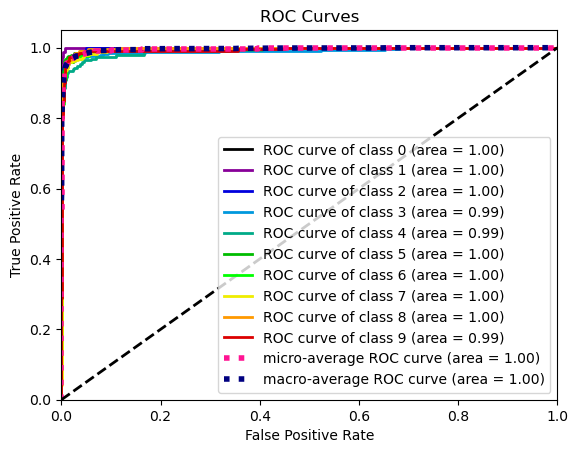

In [17]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()